In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nn.activation_functions import *
from nn.layers import Dense, InLayer
from nn.nets import Net
from nn.cost_functions import *

In [2]:
l0 = InLayer(units=784)
l1 = Dense(units=15, activation=ReLU)
l2 = Dense(units=15, activation=ReLU)
# l3 = Dense(units=20, activation=ReLU)
l4 = Dense(units=10, activation=softmax)

In [3]:
net = Net([l0,l1, l2, l4], cost_function=CrossEntropyLoss)

In [4]:
from keras.datasets import mnist

(X_train_og, Y_label), (X_test, Y_test) = mnist.load_data()
print(X_train_og.shape, Y_label.shape)
# Convert to 2d arrays rather than 3d
X_train = np.reshape(X_train_og, (X_train_og.shape[0], X_train_og.shape[1]*X_train_og.shape[2])) /255
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2])) /255

Y_train = np.eye(10)[Y_label]
print(X_train.shape, Y_label.shape)
# print(X_train[0:3,0:5])
# print(Y_train[0:10])

(60000, 28, 28) (60000,)
(60000, 784) (60000,)


In [5]:
# X_train = np.array([[-2, -2],
#                      [-1,  -2],
#                      [0,  0],
#                      [2, 2],
#                      [3, -3],
#                      [-2, 2],
#                      [2, 5],
#                      [4, 4]])
                     
# Y_train = np.sum(X_train**2, axis=1)+2 # y = x1*3 + x2*3 + 2
# # Y_train[0] = -10
# print(X_train,'\n\n', Y_train)

# Y_train = np.reshape(Y_train, (-1, 1))

In [6]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d') # or ax = plt.axes(projection='3d')
# ax.scatter3D(X_train[:,0], X_train[:,1], Y_train.reshape((-1)))
# ax.scatter3D(X_train[:,0], X_train[:,1], net.predict(X_train).reshape((-1)))

In [7]:
print(net.predict(X_train))

[[3.39832920e-04 2.38028476e-02 7.59261078e-02 ... 4.91589397e-01
  5.02156927e-02 3.66781814e-03]
 [1.59044639e-05 2.02985529e-03 2.69447848e-03 ... 9.51676037e-01
  3.30287164e-03 3.03127545e-02]
 [4.16871638e-02 2.96695957e-02 5.82523534e-02 ... 1.48319334e-01
  5.91266202e-02 1.44843443e-01]
 ...
 [4.21836203e-03 2.72551036e-02 6.49797899e-01 ... 1.70512040e-01
  4.27487910e-02 4.63869580e-03]
 [2.47456931e-03 1.85404393e-02 1.72495364e-01 ... 4.83537153e-01
  1.40108651e-01 1.26205812e-01]
 [6.69901417e-05 2.05935860e-02 8.30155584e-03 ... 8.90072870e-01
  1.00530562e-02 5.65609989e-02]]


In [8]:
net.predict(X_train).shape, Y_train.shape

((60000, 10), (60000, 10))

In [9]:
net.compute_cost(X_train, Y_train) # very high

np.float64(4.710751838247359)

In [ ]:
J_history = net.gradient_descent(X_train, Y_train, alpha=0.0005, epochs=5000, batch_size=256)

Initial cost   : Cost 4.710752
Epoch         0: Cost 4.087983
Epoch      1000: Cost 0.746837
Epoch      2000: Cost 0.547771
Epoch      3000: Cost 0.471650
Epoch      4000: Cost 0.432169
Epoch      5000: Cost 0.417379
Epoch      6000: Cost 30.798474
Epoch      7000: Cost 30.711373


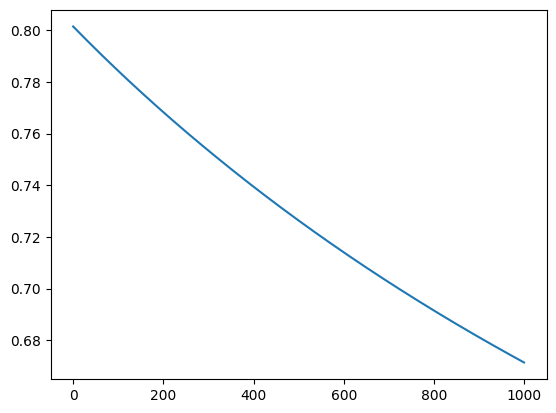

In [ ]:
plt.plot(J_history[:])

In [ ]:
net.compute_cost(X_train, Y_train) # near 0

np.float64(2.4557377738381136)

In [ ]:
y_pred = np.argmax(net.predict(X_train[100:150]), axis=1)
print(y_pred,'\n', Y_label[100:150])

[3 4 2 7 9 8 8 3 3 3 7 3 3 1 3 1 7 3 7 3 4 4 1 7 3 3 3 2 2 7 3 7 3 7 2 3 3
 1 8 8 7 1 4 1 1 8 8 9 4 3] 
 [5 7 1 7 1 1 6 3 0 2 9 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3
 8 5 4 7 7 4 2 8 5 8 6 7 3]


In [ ]:
i = 3
x_sample = X_train[i]
y_sample = Y_train[i]
net.predict(X_train),'', Y_train

(array([[0.03459303, 0.03933121, 0.13477556, ..., 0.03104152, 0.04470751,
         0.01602077],
        [0.00321181, 0.03174115, 0.09543609, ..., 0.14159037, 0.05659828,
         0.2424007 ],
        [0.10658951, 0.03964237, 0.07436365, ..., 0.04559678, 0.07151248,
         0.08472397],
        ...,
        [0.07950718, 0.03809336, 0.31176029, ..., 0.02008618, 0.02944884,
         0.01278977],
        [0.04061999, 0.0491343 , 0.1927946 , ..., 0.10280382, 0.19200714,
         0.1222056 ],
        [0.00617747, 0.19808981, 0.08484773, ..., 0.18860328, 0.09995778,
         0.13695414]]),
 '',
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d') # or ax = plt.axes(projection='3d')
# ax.scatter3D(X_train[:,0], X_train[:,1], Y_train.reshape((-1)))
# ax.scatter3D(X_train[:,0], X_train[:,1], net.predict(X_train).reshape((-1)))

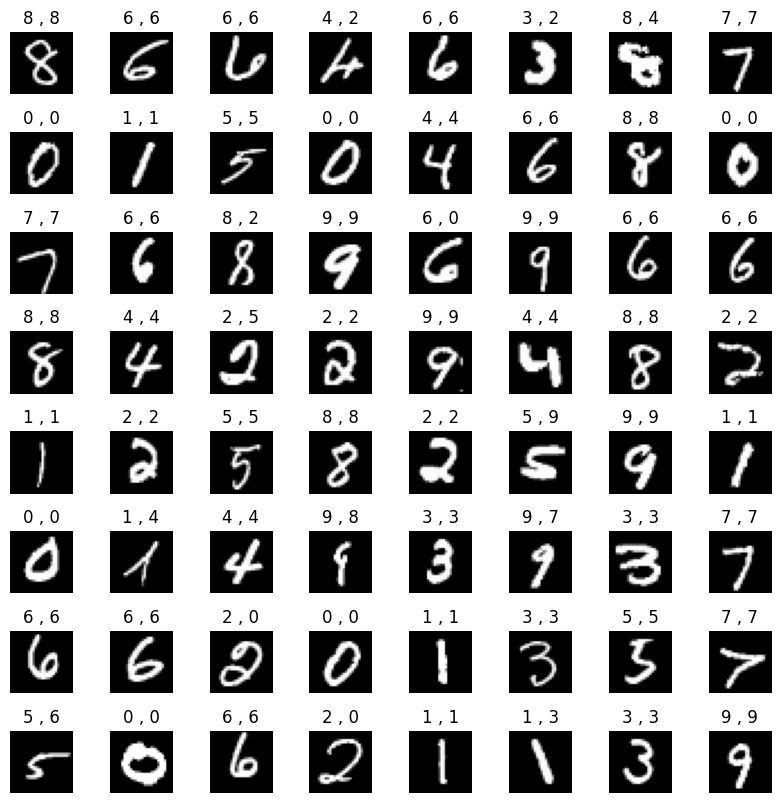

In [ ]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(10000)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image

    ax.imshow(X_random_reshaped, cmap='gray')
    y_pred = net.predict(X_random_reshaped.reshape((1, 784)))
    y_pred_label = np.argmax(y_pred, axis=1)
    
    
    # Display the label above the image
    ax.set_title(f'{Y_test[random_index]} , {y_pred_label[0]}')
    ax.set_axis_off()